In [1]:
import numpy as np
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
ati.head(5)

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,i,l_i,u_i,nus,l_nus,u_nus,P,l_P,u_P,flag
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,1.178398,1.064167,1.251533,1.671453,1.593461,1.813538,6.924557,6.382040,7.263483,NaN
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.891136,0.570728,1.303701,0.424040,0.320092,0.693356,27.294770,16.692830,36.158605,NaN
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,0.577564,0.539859,0.614492,2.126247,2.023164,2.228384,5.443428,5.193932,5.720778,NaN
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,1.217700,1.106743,1.386214,1.034966,0.972231,1.100373,11.183052,10.518321,11.904653,NaN


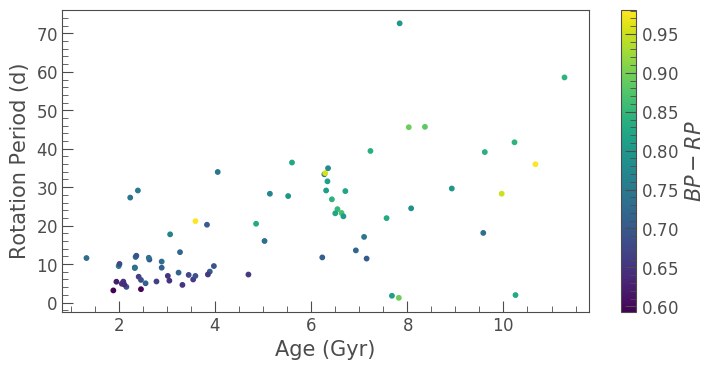

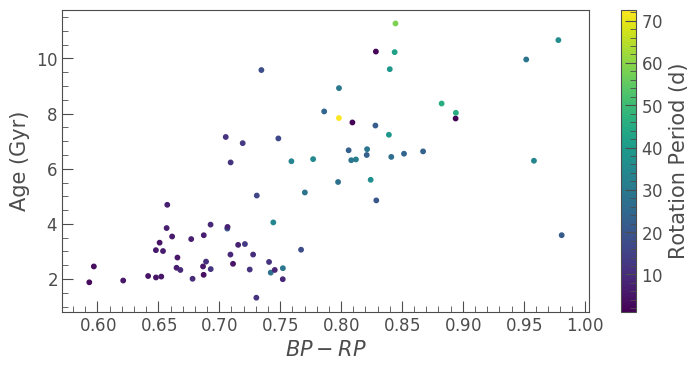

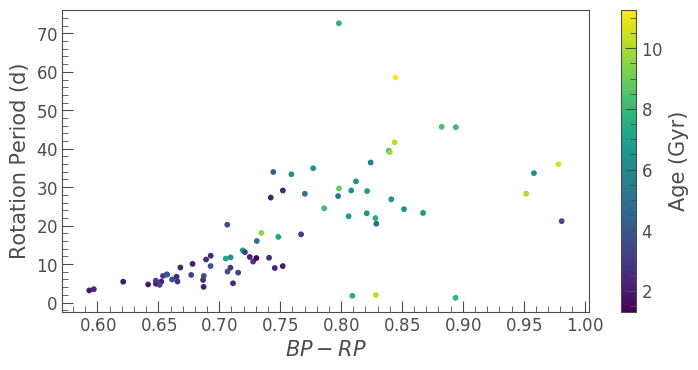

In [13]:
with plt.style.context(lk.MPLSTYLE):
    fig, ax = plt.subplots()
    c = ax.scatter(ati.age, ati.P, c=ati.bprp,s=10)
    ax.set_xlabel('Age (Gyr)')
    ax.set_ylabel('Rotation Period (d)')
    fig.colorbar(c,label=r'$BP-RP$')
    plt.show()
    
    fig, ax = plt.subplots()
    c = ax.scatter(ati.bprp, ati.age, c=ati.P,s=10)
    ax.set_ylabel('Age (Gyr)')
    ax.set_xlabel(r'$BP-RP$')
    fig.colorbar(c,label='Rotation Period (d)')
    plt.show()
    
    fig, ax = plt.subplots()
    c = ax.scatter(ati.bprp, ati.P, c=ati.age,s=10)
    ax.set_xlabel(r'$BP-RP$')
    ax.set_ylabel('Rotation Period (d)')
    fig.colorbar(c,label='Age (Gyr)')
    plt.show()